# The Beauty of Fractals
## Simple Mandelbrot Set Python Implementation

When I first heard about and especially saw the Mandelbrot set, it immediately got my attention. The representations of the fractals are just stunning and there are numerous marvelous visualizations online.

The Internet provides a huge number of explanations and implementations of the Mandelbrot set.
However, in order to better understand the concept I wanted to code it myself.

To understand the mathematical definition of the Mandelbrot set and to actually create some of the fancy images, this tutorial helped me a lot: http://warp.povusers.org/Mandelbrot/ 
So the following code and definitions are based on the formulations from the tutorial.

Python is not the fastest programming language and there are more efficient ways to calculate the Mandelbrot set (also in Python). 
The following code therefore is not suitable for efficient calculations for high resolution fractal representation. However, maybe it helps to understand the concept.

  
### Definition
The Mandelbrot set $M$ is defined as all complex numbers, for which the series $Z_n$ convergences.


$$
M = \{c \in \mathbb{C}\ \mid lim_{n \rightarrow \infty} Z_n \neq \infty \}
$$


And the series $Z_n$ is defined as:
$$
Z_n: Z_0 = c, \;\; Z_{n+1} = Z_n^2 + c
$$

  


### Implementation

So what we need to implement a function, which calculates the series $Z_n$ for a given complex number $c$, up to some number $n$ and checks whether it converges or diverges ($lim_{n \rightarrow \infty} Z_n = \infty \$). 

Of course we can only expand the series up to some point, to avoid crashing our machine. Fortunately, knowing whether the series diverges can already be determined after a relatively short period of iterations. In case $Z_n$ is smaller than 2 after 50 iterations, we will assume that the series converges and the number $c$ is part of the Mandelbrot set.

The complex number $c$ consists of a real part and a imaginary part. Those two parts of the number $c$ will be our two dimensions for plotting the Mandelbrot set. Here we specify the range for the complex numbers, for which the series $Z_n$ should be calculated. Then we simply iterate through the the specified range with some specified step size (granularity).

For each evaluated complex number $c$ the number iterations is returned, until the series diverged ($Z_n$ > 2). In case the $Z_n$ did not diverge, the maximum number of iterations is returned.

In [3]:
import cmath
import numpy as np

from PIL import Image
from matplotlib import pyplot as plt
from matplotlib import cm

In [1]:
# Calculate the Mandelbrot set values for the given coordinates
# with the granuality and number of iteratios
def mandelbrot_set(max_im, min_im, max_re, min_re, gran=0.005, it=50):
    size_x = int((max_re - min_re) / gran)
    size_y = int((max_im - min_im) / gran)
    
    mand_set = np.empty([size_y, size_x])
    
    c_x = min_re
    c_y = max_im
    
    # Iterate horizontally and vetically through given size of the plot
    # using the gran attribute as the step size
    for y in range(0, size_y):
        for x in range(0, size_x):
            # number of iterations until Z_n converges
            mand_set[y,x] = mandelbrot_value(complex(c_x,c_y), it)
            c_x = c_x + gran
        
        c_y = c_y - gran
        c_x = min_re
    
    return mand_set

# Return the number of iterations until series Z_n grows > 2
# When c is not in the Mandelbrot set: i == it - 1
def mandelbrot_value(c, it):
    # Initialize first value of series with c
    z = c
    
    # Expand the series for the provided number of iterations
    for i in range(0,it):
        z = z**2 + c
        
        if abs(z) > 2:
            return i
    
    return i

## Min-Max Scaling
# Scale the values of the given matrix to values in [0,1]
def scale_matrix(np_matrix):
    max = np.max(np_matrix)
    min = np.min(np_matrix)
    
    return (np_matrix -min) / (max-min)

### Calculate and Plot the Mandelbrot Set

The horizontal axis of the image represents the real part of $c$ and the vertical the imaginary part.

To achieve the nice looking plots, we scale the returned values for each point. The minimum is always going to be 0 and the maximum value 1.

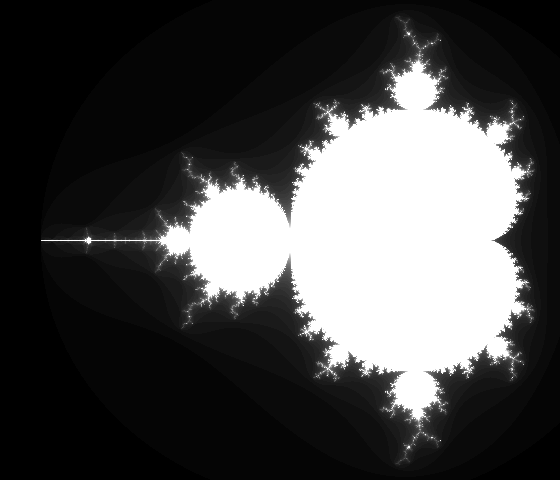

In [78]:
m_set = mandelbrot_set(max_im=1.2, min_im= -1.2, max_re=0.6, min_re=-2.2)

# Use the pillow package to generate a grayscale picture from the array
Image.fromarray((scale_matrix(m_set) * 255).astype(np.uint8))

Here we have used the coordinates which display the fully visible set of the Mandelbrot set. The white areas depict the numbers which are within the Mandelbrot set. 

The pattern already looks much like some of the stunning representations, but the beautiful colors are missing. So lets add some nice color palettes to create nicer plots.


#### Look at the available Color Palettes

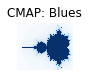

<Figure size 432x288 with 0 Axes>

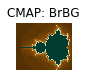

<Figure size 432x288 with 0 Axes>

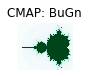

<Figure size 432x288 with 0 Axes>

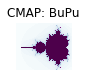

<Figure size 432x288 with 0 Axes>

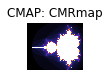

<Figure size 432x288 with 0 Axes>

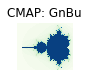

<Figure size 432x288 with 0 Axes>

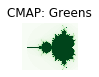

<Figure size 432x288 with 0 Axes>

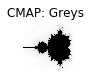

<Figure size 432x288 with 0 Axes>

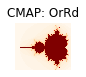

<Figure size 432x288 with 0 Axes>

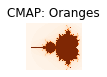

<Figure size 432x288 with 0 Axes>

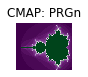

<Figure size 432x288 with 0 Axes>

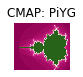

<Figure size 432x288 with 0 Axes>

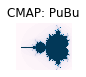

<Figure size 432x288 with 0 Axes>

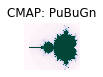

<Figure size 432x288 with 0 Axes>

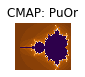

<Figure size 432x288 with 0 Axes>

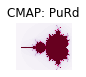

<Figure size 432x288 with 0 Axes>

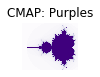

<Figure size 432x288 with 0 Axes>

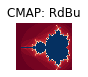

<Figure size 432x288 with 0 Axes>

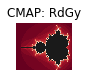

<Figure size 432x288 with 0 Axes>

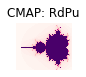

<Figure size 432x288 with 0 Axes>

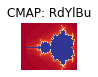

<Figure size 432x288 with 0 Axes>

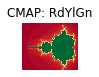

<Figure size 432x288 with 0 Axes>

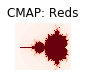

<Figure size 432x288 with 0 Axes>

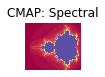

<Figure size 432x288 with 0 Axes>

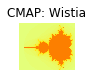

<Figure size 432x288 with 0 Axes>

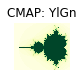

<Figure size 432x288 with 0 Axes>

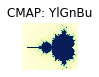

<Figure size 432x288 with 0 Axes>

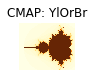

<Figure size 432x288 with 0 Axes>

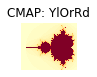

<Figure size 432x288 with 0 Axes>

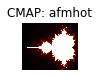

<Figure size 432x288 with 0 Axes>

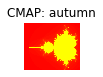

<Figure size 432x288 with 0 Axes>

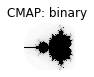

<Figure size 432x288 with 0 Axes>

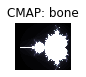

<Figure size 432x288 with 0 Axes>

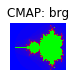

<Figure size 432x288 with 0 Axes>

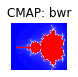

<Figure size 432x288 with 0 Axes>

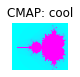

<Figure size 432x288 with 0 Axes>

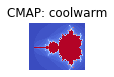

<Figure size 432x288 with 0 Axes>

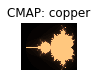

<Figure size 432x288 with 0 Axes>

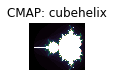

<Figure size 432x288 with 0 Axes>

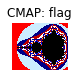

<Figure size 432x288 with 0 Axes>

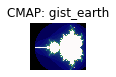

<Figure size 432x288 with 0 Axes>

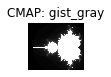

<Figure size 432x288 with 0 Axes>

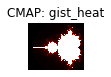

<Figure size 432x288 with 0 Axes>

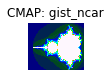

<Figure size 432x288 with 0 Axes>

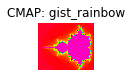

<Figure size 432x288 with 0 Axes>

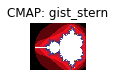

<Figure size 432x288 with 0 Axes>

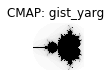

<Figure size 432x288 with 0 Axes>

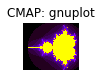

<Figure size 432x288 with 0 Axes>

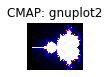

<Figure size 432x288 with 0 Axes>

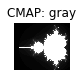

<Figure size 432x288 with 0 Axes>

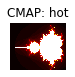

<Figure size 432x288 with 0 Axes>

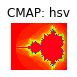

<Figure size 432x288 with 0 Axes>

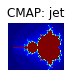

<Figure size 432x288 with 0 Axes>

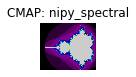

<Figure size 432x288 with 0 Axes>

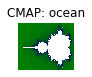

<Figure size 432x288 with 0 Axes>

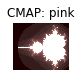

<Figure size 432x288 with 0 Axes>

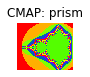

<Figure size 432x288 with 0 Axes>

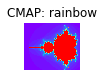

<Figure size 432x288 with 0 Axes>

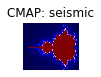

<Figure size 432x288 with 0 Axes>

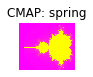

<Figure size 432x288 with 0 Axes>

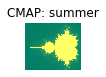

<Figure size 432x288 with 0 Axes>

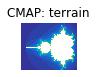

<Figure size 432x288 with 0 Axes>

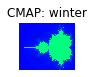

<Figure size 432x288 with 0 Axes>

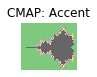

<Figure size 432x288 with 0 Axes>

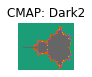

<Figure size 432x288 with 0 Axes>

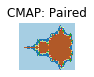

<Figure size 432x288 with 0 Axes>

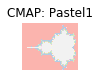

<Figure size 432x288 with 0 Axes>

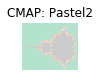

<Figure size 432x288 with 0 Axes>

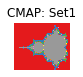

<Figure size 432x288 with 0 Axes>

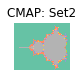

<Figure size 432x288 with 0 Axes>

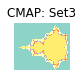

<Figure size 432x288 with 0 Axes>

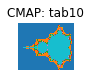

<Figure size 432x288 with 0 Axes>

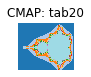

<Figure size 432x288 with 0 Axes>

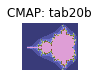

<Figure size 432x288 with 0 Axes>

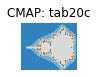

<Figure size 432x288 with 0 Axes>

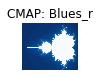

<Figure size 432x288 with 0 Axes>

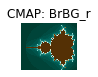

<Figure size 432x288 with 0 Axes>

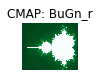

<Figure size 432x288 with 0 Axes>

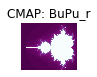

<Figure size 432x288 with 0 Axes>

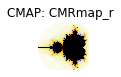

<Figure size 432x288 with 0 Axes>

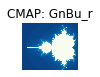

<Figure size 432x288 with 0 Axes>

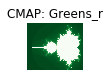

<Figure size 432x288 with 0 Axes>

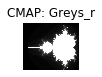

<Figure size 432x288 with 0 Axes>

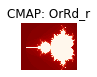

<Figure size 432x288 with 0 Axes>

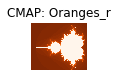

<Figure size 432x288 with 0 Axes>

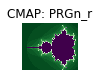

<Figure size 432x288 with 0 Axes>

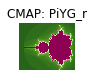

<Figure size 432x288 with 0 Axes>

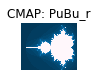

<Figure size 432x288 with 0 Axes>

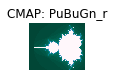

<Figure size 432x288 with 0 Axes>

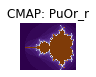

<Figure size 432x288 with 0 Axes>

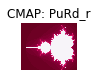

<Figure size 432x288 with 0 Axes>

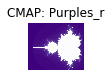

<Figure size 432x288 with 0 Axes>

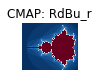

<Figure size 432x288 with 0 Axes>

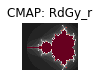

<Figure size 432x288 with 0 Axes>

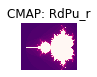

<Figure size 432x288 with 0 Axes>

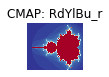

<Figure size 432x288 with 0 Axes>

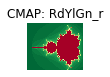

<Figure size 432x288 with 0 Axes>

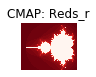

<Figure size 432x288 with 0 Axes>

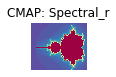

<Figure size 432x288 with 0 Axes>

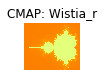

<Figure size 432x288 with 0 Axes>

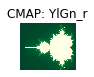

<Figure size 432x288 with 0 Axes>

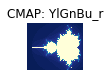

<Figure size 432x288 with 0 Axes>

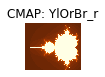

<Figure size 432x288 with 0 Axes>

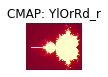

<Figure size 432x288 with 0 Axes>

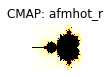

<Figure size 432x288 with 0 Axes>

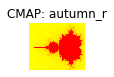

<Figure size 432x288 with 0 Axes>

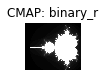

<Figure size 432x288 with 0 Axes>

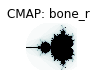

<Figure size 432x288 with 0 Axes>

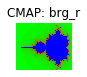

<Figure size 432x288 with 0 Axes>

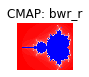

<Figure size 432x288 with 0 Axes>

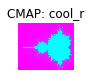

<Figure size 432x288 with 0 Axes>

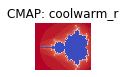

<Figure size 432x288 with 0 Axes>

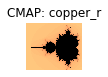

<Figure size 432x288 with 0 Axes>

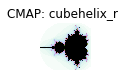

<Figure size 432x288 with 0 Axes>

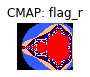

<Figure size 432x288 with 0 Axes>

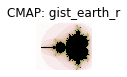

<Figure size 432x288 with 0 Axes>

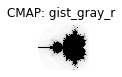

<Figure size 432x288 with 0 Axes>

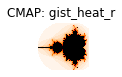

<Figure size 432x288 with 0 Axes>

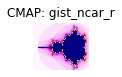

<Figure size 432x288 with 0 Axes>

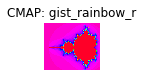

<Figure size 432x288 with 0 Axes>

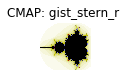

<Figure size 432x288 with 0 Axes>

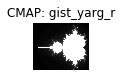

<Figure size 432x288 with 0 Axes>

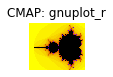

<Figure size 432x288 with 0 Axes>

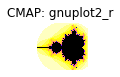

<Figure size 432x288 with 0 Axes>

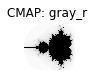

<Figure size 432x288 with 0 Axes>

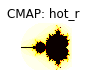

<Figure size 432x288 with 0 Axes>

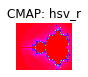

<Figure size 432x288 with 0 Axes>

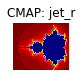

<Figure size 432x288 with 0 Axes>

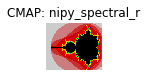

<Figure size 432x288 with 0 Axes>

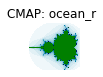

<Figure size 432x288 with 0 Axes>

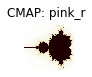

<Figure size 432x288 with 0 Axes>

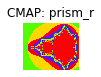

<Figure size 432x288 with 0 Axes>

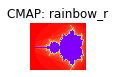

<Figure size 432x288 with 0 Axes>

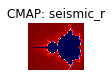

<Figure size 432x288 with 0 Axes>

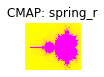

<Figure size 432x288 with 0 Axes>

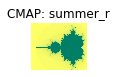

<Figure size 432x288 with 0 Axes>

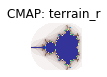

<Figure size 432x288 with 0 Axes>

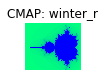

<Figure size 432x288 with 0 Axes>

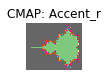

<Figure size 432x288 with 0 Axes>

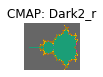

<Figure size 432x288 with 0 Axes>

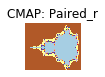

<Figure size 432x288 with 0 Axes>

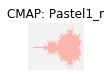

<Figure size 432x288 with 0 Axes>

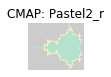

<Figure size 432x288 with 0 Axes>

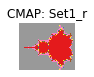

<Figure size 432x288 with 0 Axes>

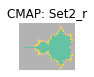

<Figure size 432x288 with 0 Axes>

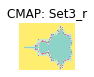

<Figure size 432x288 with 0 Axes>

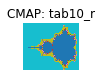

<Figure size 432x288 with 0 Axes>

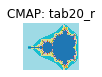

<Figure size 432x288 with 0 Axes>

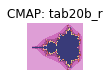

<Figure size 432x288 with 0 Axes>

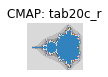

<Figure size 432x288 with 0 Axes>

In [19]:
# Caculate low resolution Mandelbrot set
small_mandelbrot_set = mandelbrot_set(max_im=1.2, min_im= -1.2, max_re=0.6, min_re=-2.2, gran=0.05, it=50)

# Scale values
small_mandelbrot_set = scale_matrix(small_mandelbrot_set)

# Iterate through all available color palettes and plot the result
for x in cm.datad.keys():
    plt.figure(figsize=(1,1))
    plt.imshow(Image.fromarray(np.uint8(cm.get_cmap(x)(m_set_small)*255).astype(np.uint8)))
    plt.axis('off')
    
    plt.title("CMAP: "+x)
    plt.show()
    
    plt.clf()

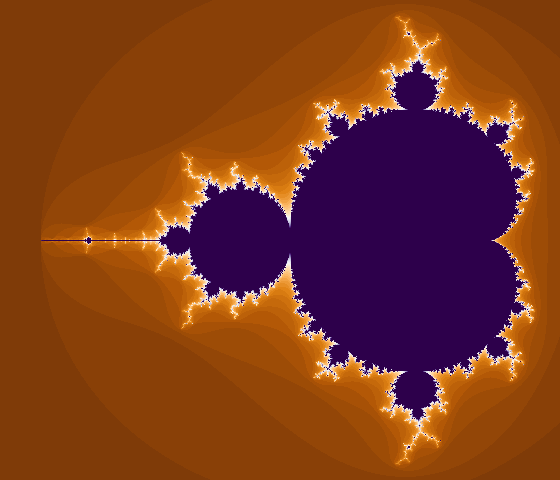

In [123]:
# Plot the full resolution picture using the 'PuOr' color palette
Image.fromarray((cm.PuOr(scale_matrix(m_set))*255).astype(np.uint8))

Using some different color map makes the image looks much nicer! This is however only due to applying a different method to interpret the calculated values as colors for plotting. The actual values are the same as in the black and white image.


Next, let's look into a simple variation of the Mandelbrot set.

## The Julia Set

The Julia set is a simple variation of the Mandelbrot set. Instead of adding the complex number which we are currently looking at, we always add some constant complex number $K$.

Formally the set is then defined as:

$$
J = \{c \in \mathbb{C}\ \mid lim_{n \rightarrow \infty} Z_n \neq \infty \}
$$


And the series $Z_n$ is defined as:
$$
Z_n: Z_0 = K, \;\; Z_{n+1} = Z_n^2 + K
$$

In [124]:
# Calculate the Julia set values for the given coordinates
# with the granuality and number of iteratios
def julia_set(max_im, min_im, max_re, min_re, gran=0.005, it=50, k=(0.4, 0.3)):
    size_x = int((max_re - min_re) / gran)
    size_y = int((max_im - min_im) / gran)
    
    julia_set = np.empty([size_y, size_x])
    
    c_x = min_re
    c_y = max_im
    
    for y in range(0, size_y):
        for x in range(0, size_x):
            julia_set[y,x] = julia_value(complex(c_x, c_y), it, k= k)
            c_x = c_x + gran
        
        c_y = c_y - gran
        c_x = min_re
    
    return julia_set

# Return the number of iterations until the number goes beyond 2
# When c in the set, i == it-1
def julia_value(c, it, k):
    z = c
    for i in range(0,it):
        z = z**2 + complex(k[0], k[1])
        
        if abs(z) > 2:
            return i
    
    return i

In contrast to the Mandelbrot set, the Julia set (and hence it visualization) can be modified by choosing different values for $K$. For the Mandelbrot set, different visualizations only result by displaying different areas of the (zoomed in) plot.

Let's see how the Julia set changes when changing the real and imaginary part of the constant complex number $K$.

Here we will plot the forms of the Julia set for the in the interval $[0,1]$ for both the imaginary and real part of the complex number constant $K$.

Different shapes of Julia set when changing the constant K
Horizontal Axis: real part of K from 0 - 1
Vertical Axis: imaginary part of K from 0 - 1


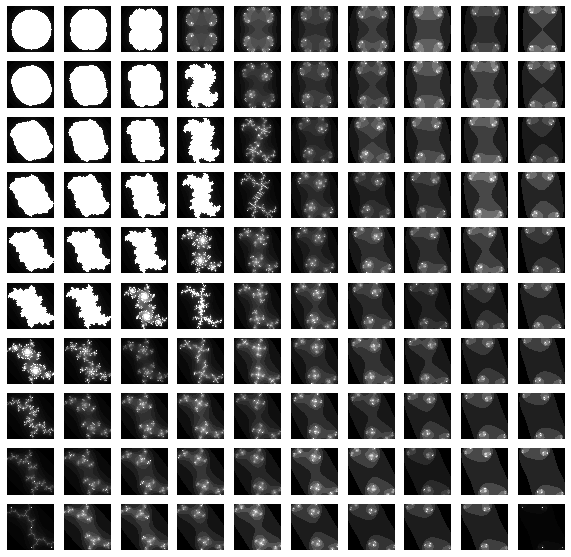

In [116]:
# Number of evaluated values for
n = 10

print('Different shapes of Julia set when changing the constant K')
print('Horizontal Axis: real part of K from 0 - 1')
print('Vertical Axis: imaginary part of K from 0 - 1')

plt.figure(figsize=(10,10))

for i in range(n**2):
    # horizontal axis
    re = i % n * (1 / (n-1))
    # vertical axis
    im = int(i / n) * (1 / (n-1))
    
    plt.subplot(n, n, i+1)
    
    small_julia_set = julia_set(max_im=1.2, min_im= -1.2, max_re=1.2, min_re=-1.2, gran=0.05, k=(re, im))
    
    plt.imshow(Image.fromarray(scale_matrix(small_julia_set)* 255))
    plt.axis('off')

And now using only one nice form using a fancy color palette.

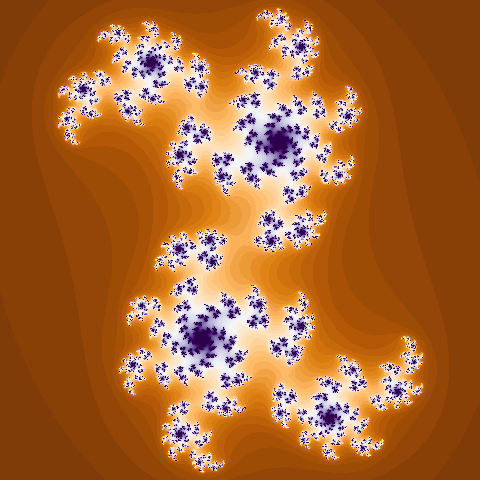

In [122]:
# Calculate the Julia 
j_set = julia_set(max_im=1.2, min_im= -1.2, max_re=1.2, min_re=-1.2, k=(0.4,0.3))

Image.fromarray((cm.PuOr(scale_matrix(j_set)) * 255).astype(np.uint8))

In this basic example we have only plotted static forms of the Mandelbrot/Julia set. 

Zooming into some of the border regions reveals even more amazing structures. Those are also the parts which are used for the infinite zoom videos. 